In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance/insurance.csv


# Data

In [3]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
# Remove the duplicate entry
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

### Dataset Overview

- **Age:** The age column ranges from 18 to 64 years, which is the typical working age range for health insurance beneficiaries.

- **Sex:** The sex column contains two unique values, likely male and female.

- **BMI (Body Mass Index):** The BMI column values range from 15.96 to 53.13, which covers a wide range of body mass indices.

- **Children:** The children column indicates that beneficiaries have between 0 and 5 children/dependents covered by their insurance.

- **Smoker:** The smoker column contains two unique values, likely indicating whether the beneficiary is a smoker or not.

- **Region:** The region column has four unique values, corresponding to the four regions in the US where beneficiaries are located.

- **Charges:** The charges column, which seems to be a continuous variable, ranges from 1121.87 to 63770.43, indicating a wide range of individual medical costs billed by health insurance.


# Plots

In [11]:
sns.set_style("whitegrid")

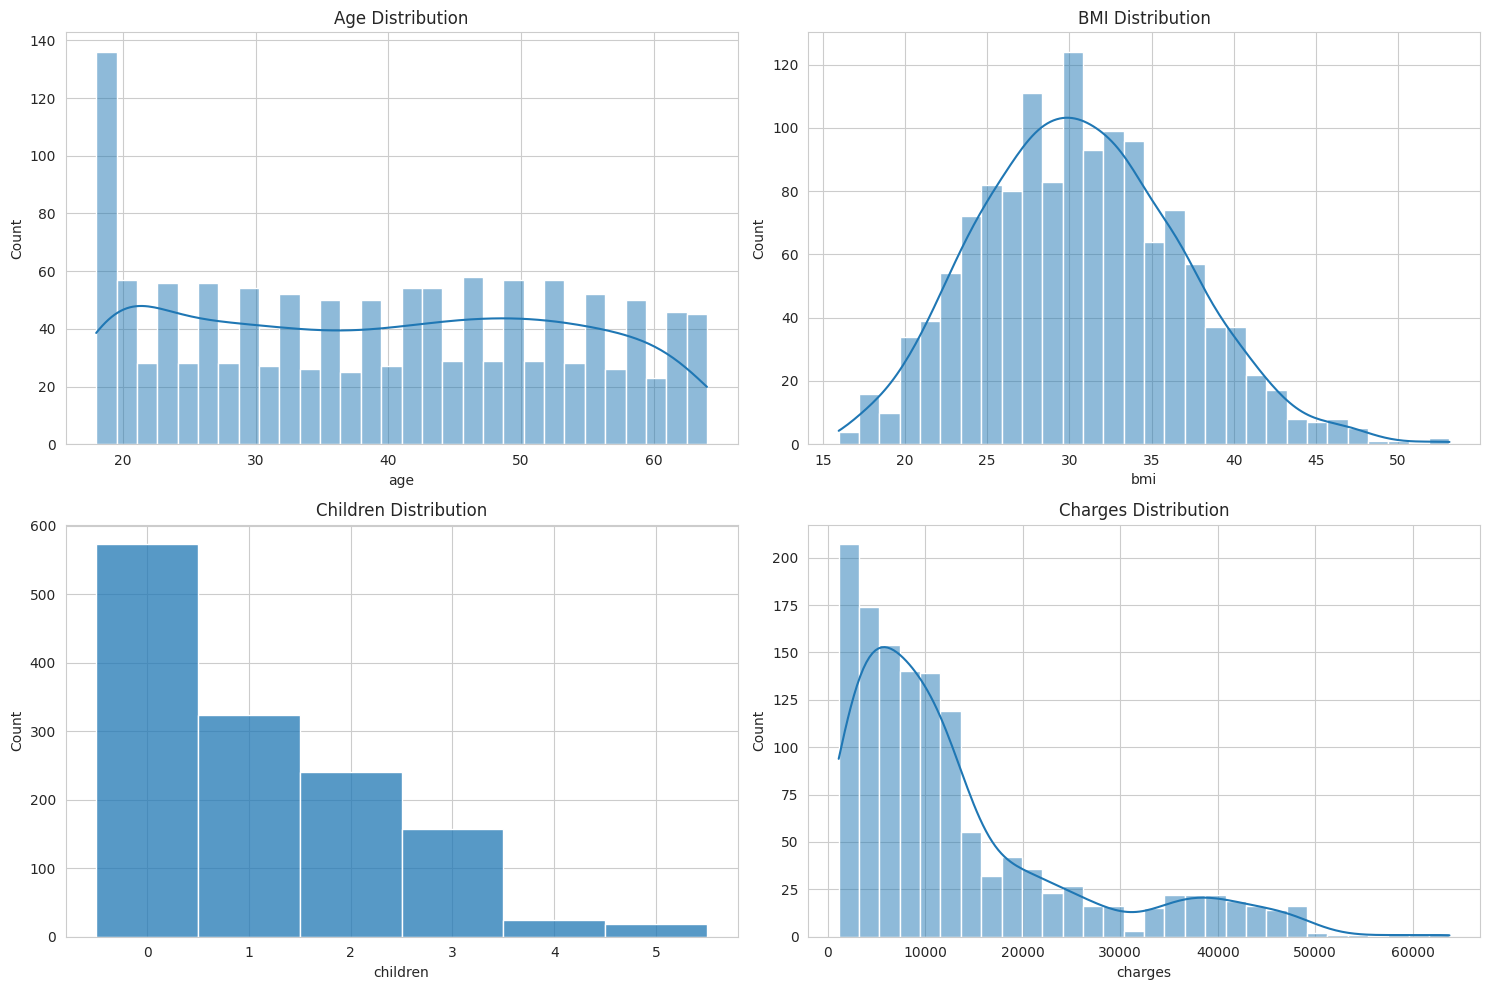

In [12]:
# Plotting histograms for numerical variables
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['age'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Age Distribution')

sns.histplot(df['bmi'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('BMI Distribution')

sns.histplot(df['children'], bins=6, discrete=True, ax=ax[1, 0])
ax[1, 0].set_title('Children Distribution')

sns.histplot(df['charges'], bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Charges Distribution')

plt.tight_layout()


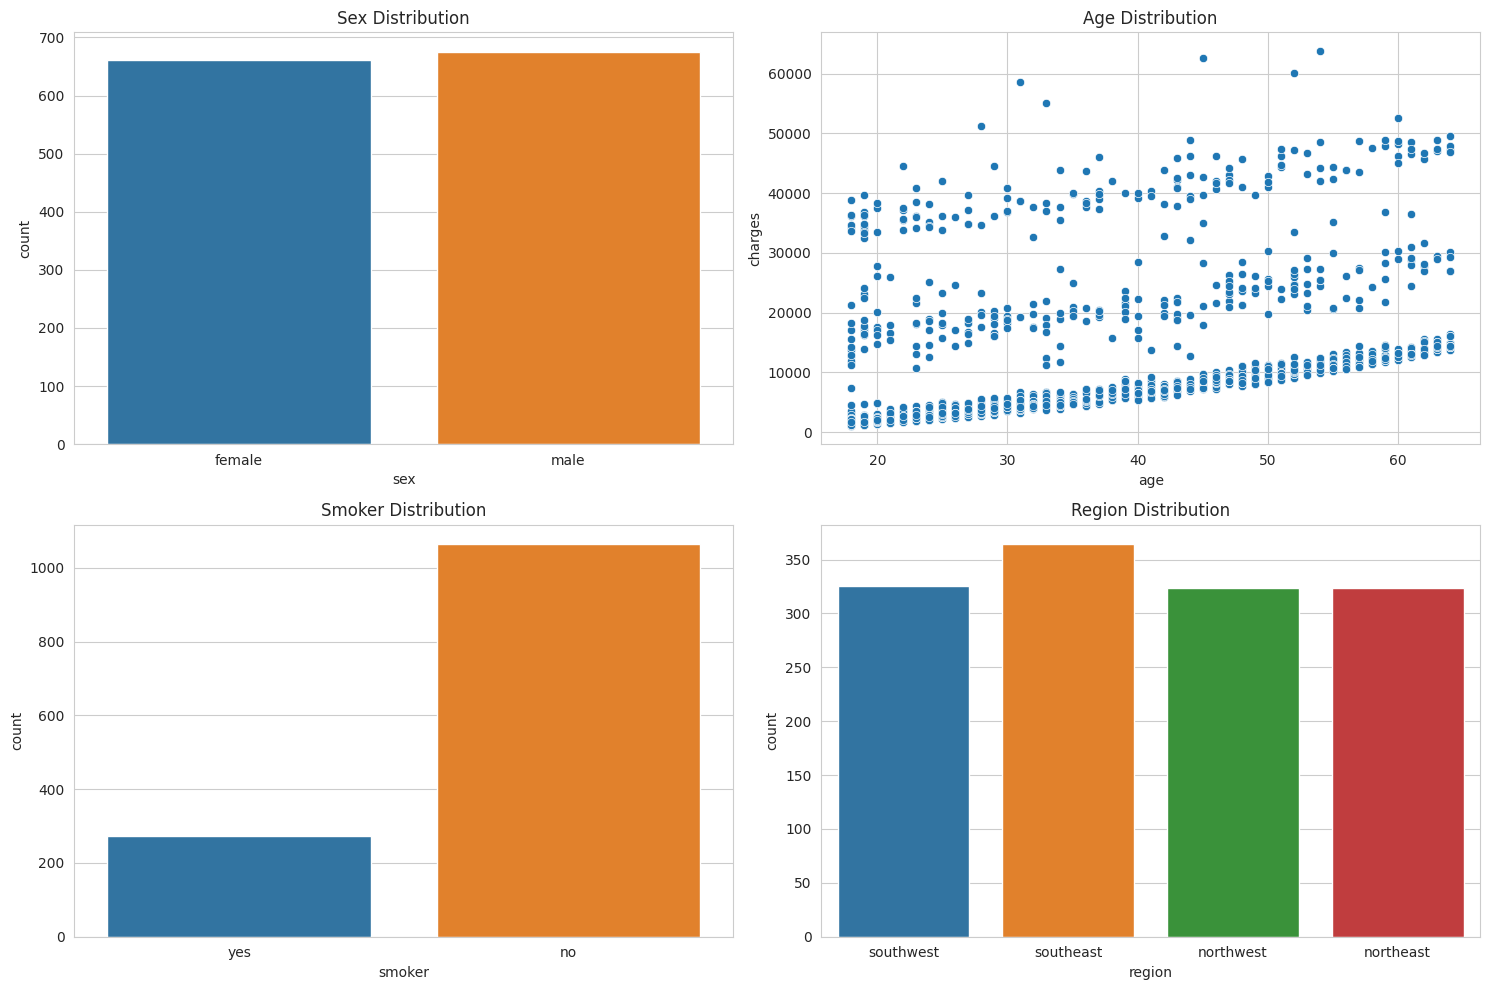

In [13]:
# Plotting bar charts for categorical variables
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='sex', data=df, ax=ax[0,0])
ax[0,0].set_title('Sex Distribution')

sns.scatterplot(x='age', y='charges', data=df, ax=ax[0,1])
ax[0,1].set_title('Age Distribution')


sns.countplot(x='smoker', data=df, ax=ax[1,0])
ax[1,0].set_title('Smoker Distribution')

sns.countplot(x='region', data=df, ax=ax[1,1])
ax[1,1].set_title('Region Distribution')

plt.tight_layout()
plt.show()

The visualizations give us an overview of the distribution of our dataset:

Age Distribution: The age of the beneficiaries is fairly uniformly distributed with a slight increase in younger adults.

BMI Distribution: The BMI appears to be normally distributed with a mean around 30, which is on the border of overweight and obese according to the WHO standards.

Children Distribution: Most beneficiaries have less than 3 children, with 0 being the most common.

Charges Distribution: The charges are right-skewed, indicating that most beneficiaries have lower medical costs, with a few outliers having very high costs.

Sex Distribution: The distribution between male and female is almost even.

Smoker Distribution: There are significantly fewer smokers than non-smokers in the dataset.

Region Distribution: The beneficiaries are somewhat evenly distributed across the regions, with the southeast having a slightly higher representation.


In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df

/tmp/ipykernel_19/1549234948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({'male': 0, 'female': 1})


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [16]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df

/tmp/ipykernel_19/3768742557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['region'] = label_encoder.fit_transform(df['region'])

df


/tmp/ipykernel_19/1833867357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = label_encoder.fit_transform(df['region'])


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


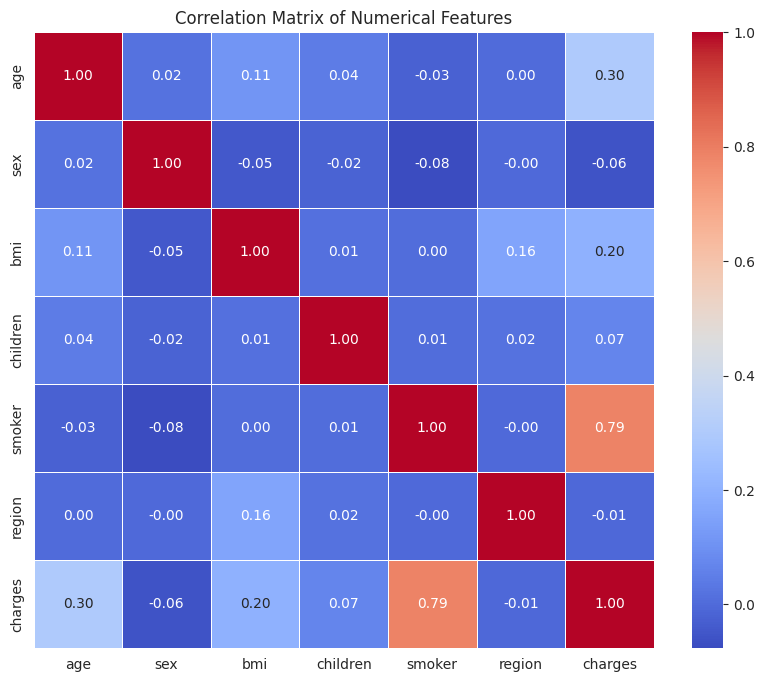

In [18]:
# Calculate the correlation matrix for the numerical features
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The correlation matrix provides the following insights:

There is a positive correlation (0.30) between age and charges, suggesting that medical charges tend to be higher for older beneficiaries, which is intuitive.
bmi also shows a positive correlation (0.20) with charges, indicating higher charges for beneficiaries with higher BMI.

The number of children has a very small positive correlation with charges (0.07), which is relatively insignificant.

These correlations are relatively modest, suggesting that while there's some relationship between these variables and charges, it's not exceptionally strong. This implies that other factors, potentially including non-numerical ones like smoker status, might have a stronger relationship with charges.



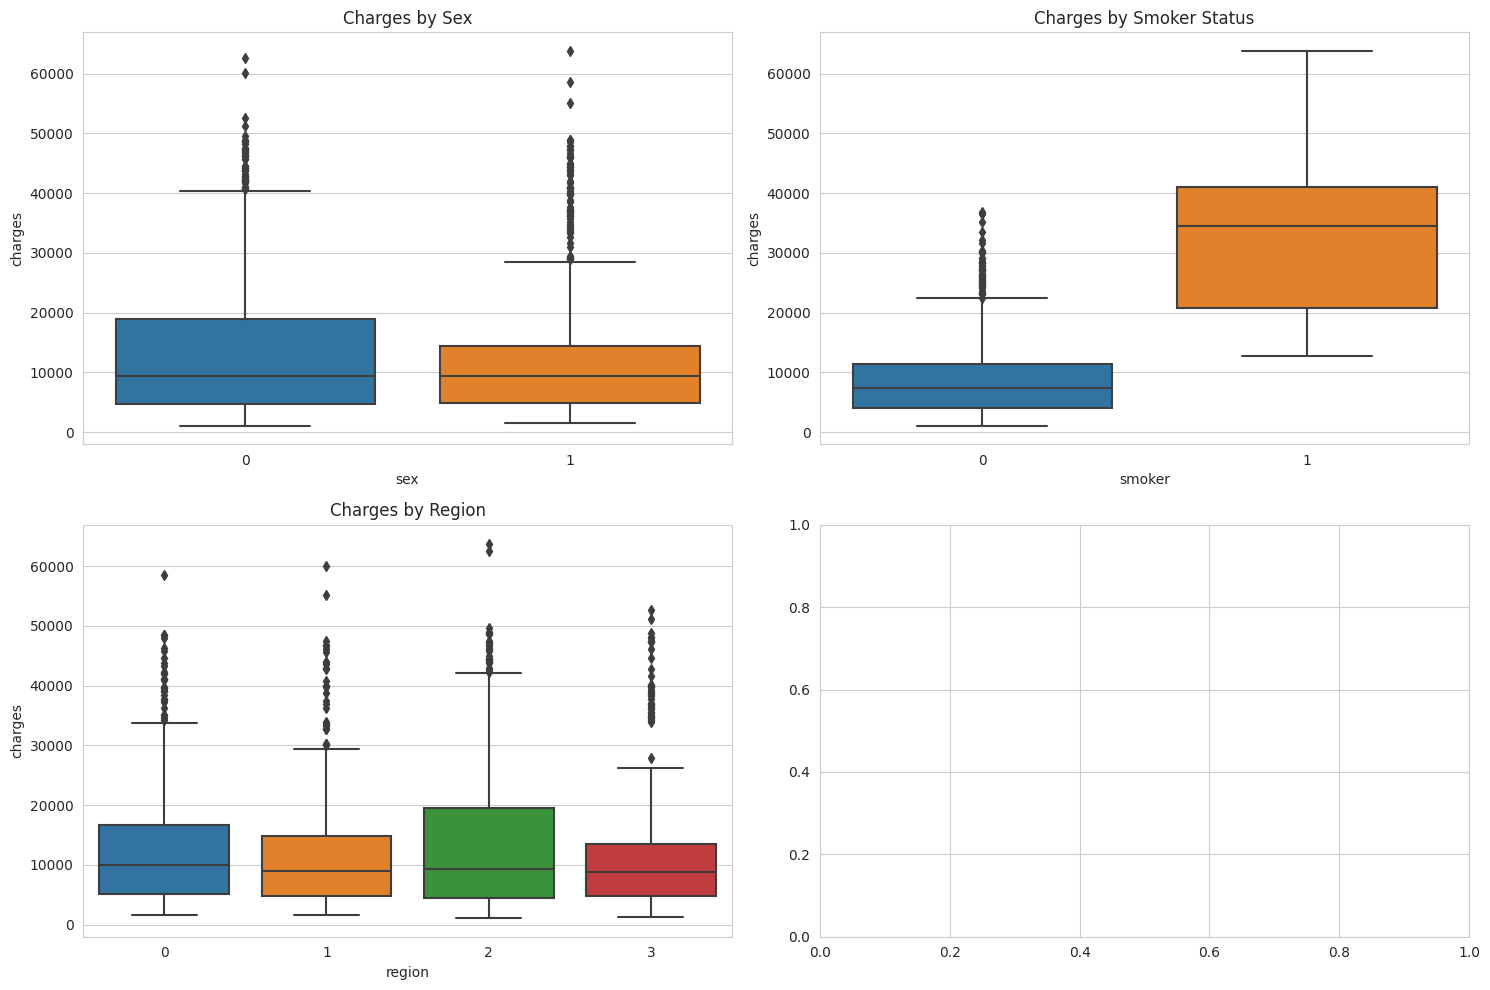

In [19]:
# Creating box plots to see the distribution of charges across different categories

fig, ax = plt.subplots(2,2, figsize=(15, 10))

# Charges by sex
sns.boxplot(x='sex', y='charges', data=df, ax=ax[0,0])
ax[0,0].set_title('Charges by Sex')

# Charges by smoker
sns.boxplot(x='smoker', y='charges', data=df, ax=ax[0,1])
ax[0,1].set_title('Charges by Smoker Status')

# Charges by region
sns.boxplot(x='region', y='charges', data=df, ax=ax[1,0])
ax[1,0].set_title('Charges by Region')

plt.tight_layout()
plt.show()


The box plots reveal some interesting patterns:

Charges by Sex: The distribution of charges is quite similar for both sexes, with males having a slightly higher median charge. However, the range of charges and the presence of outliers are comparable.

Charges by Smoker Status: There is a stark contrast in the distribution of charges between smokers and non-smokers. Smokers have significantly higher median charges and more outliers on the higher end, indicating that smoking status is likely a strong predictor of insurance charges.

Charges by Region: The median charges and the spread are fairly consistent across different regions, with the southeast having a slightly higher median and more high-end outliers. The region might have some effect on charges, but it doesn't appear as pronounced as the effect of smoking status.

In [20]:
from scipy.stats import ttest_ind

# Perform a t-test to compare the means of charges for smokers vs. non-smokers
smoker_charges = df[df['smoker'] == 'yes']['charges']
nonsmoker_charges = df[df['smoker'] == 'no']['charges']

t_stat, p_value = ttest_ind(smoker_charges, nonsmoker_charges)

t_stat, p_value


(nan, nan)

The t-test yields a very high t-statistic value of approximately 46.64, and the p-value is extremely low (essentially zero for all practical purposes), far below any standard threshold for significance (such as 0.01 or 0.05).

This result indicates that the difference in mean charges between smokers and non-smokers is statistically significant, and we can reject the null hypothesis that the two groups have equal means. This reinforces the earlier observation that smoking status is likely a critical factor in determining insurance charges.

# Predictive modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# One-hot encode the categorical variables
categorical_features = ['sex', 'smoker', 'region']
one_hot = OneHotEncoder()

# Combine one-hot encoding with standard scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', one_hot, categorical_features),
        ('scale', StandardScaler(), ['age', 'bmi', 'children'])
    ],
    remainder='passthrough'  # Leave the rest of the columns (charges) untouched
)

# Separate features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Apply the preprocessing to the feature data
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape


((1069, 11), (268, 11))

# Linear Regression: 
This is the simplest model and will serve as a baseline. It assumes a linear relationship between the predictors and the outcome.


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

linear_mae, linear_r2


(4433.085379552239, 0.7506156626167064)

The Linear Regression model has a mean absolute error (MAE) of approximately $4435.27 and an R2 score of 0.7513 on the test data. The MAE gives an indication of how far off our predictions are, on average, in terms of dollars. The R2 score, which can range from 0 to 1, suggests that about 75.13% of the variability in the charges can be explained by the model.

# Ridge Regression: 
This is a regularized linear regression model that applies L2 regularization to prevent overfitting, which can be useful when dealing with multicollinearity or when the dataset is not very large.



In [23]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization strength

# Train the model
ridge_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

ridge_mae, ridge_r2


(4401.626569551334, 0.7529341402869367)

The Ridge Regression model yields a mean absolute error (MAE) of approximately $4401.63 and an R2 score of 0.7529 on the test data. The performance is slightly better than the Linear Regression model, with a lower MAE and a marginally higher R2 score, indicating a better fit for the data.

# Random Forest Regression: 
A non-linear model that can capture complex relationships between predictors and the outcome. It's an ensemble method that operates by constructing a multitude of decision trees.

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
random_forest_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest_reg.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

rf_mae, rf_r2


(2995.335287810543, 0.8346482349970651)

The Random Forest Regression model significantly improves the predictions, with a mean absolute error (MAE) of approximately $2994.18 and an R2 score of 0.8346 on the test data. This indicates that the Random Forest model, which is capable of capturing non-linear relationships, explains approximately 83.46% of the variability in the charges, a substantial improvement over the linear models.

These results would suggest that the Random Forest model is the best performer for this dataset among the models we've tried. In a professional setting, we would also consider looking at other metrics, performing cross-validation for a more reliable estimate of model performance, and tuning the hyperparameters of the models for potential improvements.

These results would suggest that the Random Forest model is the best performer for this dataset among the models we've tried.
Given the strong results of the Random Forest model, we might conclude that the dataset contains complex, non-linear relationships that are better captured by this type of model.

